In [ ]:
# To Hndle The Data
import pandas as pd
import numpy as np

# To Visualize the data
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
import seaborn as sns
%matplotlib inline

# To Hnadle Warnings during the execution of the code
import warnings
warnings.filterwarnings("ignore")


# Importing the dataset for analysis


In [ ]:
data =pd.read_csv("../data/raw/train.csv")
data.head(5)

# Exploratory Data Analysis

In [ ]:
# check the shape of the dataset i.e number of rows and columns
data.shape

In [62]:
# exploratory data analysis, giving an overview of the dataset i.e the number of rows, columns, data types and non-null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [ ]:
# listing the columns in the dataset
data.columns

In [ ]:
data.drop(columns=["Id"], inplace=True)

In [ ]:


# calculate the percentage of missing value per column in the dataset
missing_percentage = data.isnull().mean() * 100

# Optional: Display only columns with missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Print the result
print(missing_percentage.sort_values(ascending=False))


In [ ]:
# visualizing the percentage of missing values per column
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_percentage.values, y=missing_percentage.index, palette="viridis")
plt.xlabel("Percentage of Missing Values")
plt.ylabel("Columns")
plt.title("Missing Value Percentage per Column")
plt.tight_layout()
plt.show()

## observation from the above information
* - The dataset contains 81 columns and 1460 rows
* - There are 35 integers, 3 floats and 43 objects in the dataset
* - Columns ike MiscFeature,Fence,PoolQC,FireplaceQU, Alley, MasVnrType, LotFrontage, have high NAN percentage
* - Important numerical features like LotFrontage, GarageYrBlt, and MasVnrArea also contain some missing values.
* - Id is just a unique identifier and not useful for analysis.
* - Some columns have incorrect data types.
* - OverallQual, OverallCond are ordinal variables, but currently treated as integers.
* - MSSubClass represents building category, so it should be categorical, not integer

<h2>Analysing and cleaning  each columns of the dataset</h2>

In [ ]:
data.describe().T

In [ ]:
skewness = data.select_dtypes(include="number").skew().sort_values(ascending=False)

In [ ]:
# visualizing the skewness of numerical features

plt.figure(figsize=(10, 6))
sns.barplot(x=skewness.values, y=skewness.index, palette='coolwarm')
plt.title("Skewness of Numerical Features")
plt.xlabel("Skewness")
plt.ylabel("Features")
plt.axvline(x=0, color='black', linestyle='--')  # vertical line at 0 for reference
plt.tight_layout()
plt.show()

In [ ]:
# Separate columns
# Categorical columns: object and category types
categorical_cols = data.select_dtypes(include=['object', 'category']).columns.tolist()

# Numerical columns: int and float types
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()


# Subset data
data_categorical = data[categorical_cols]
data_numerical = data[numerical_cols]


In [64]:
missing_categorical = data_categorical.isnull().sum()


print("Missing value in categorical columns: \n", missing_categorical[missing_categorical > 0])

Missing value in categorical columns: 
 Alley           1369
MasVnrType       872
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [ ]:
# percentage of missing values in categorical columns
# Calculate total number of rows
total_rows = len(data_categorical)

# Compute percentage
missing_categorical_percent = (missing_categorical / total_rows) * 100

# Display result
print("Missing percentage in categorical columns:\n")
print(missing_categorical_percent.sort_values(ascending=False).round(2))

In [ ]:
# Get a colormap and normalize values
cmap = get_cmap("plasma")  # You can change this to 'viridis', 'magma', etc.
norm = plt.Normalize(missing_categorical_percent.min(), missing_categorical_percent.max())
colors = [cmap(norm(val)) for val in missing_categorical_percent.values]

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    x=missing_categorical_percent.values,
    y=missing_categorical_percent.index,
    palette=colors  # Apply gradient colors
)

plt.xlabel("Percentage of Missing Values")
plt.ylabel("Categorical Columns")
plt.title("Missing Value Percentage in Categorical Columns")
plt.xlim(0, 100)
plt.tight_layout()
plt.show()

In [ ]:
categorical_cols_to_drop = [
    "MiscFeature", "Fence", "PoolQC", "FireplaceQu", "Alley"
]

data.drop(columns=categorical_cols_to_drop, inplace=True)

In [63]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

In [ ]:
def update_categorical_data(data):
    return data.select_dtypes(include=["object", "category"]).copy()

In [61]:
data_categorical.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [65]:
data_categorical["MasVnrType"].isnull().sum()

872

In [67]:
data_categorical["MasVnrType"].unique()

array(['BrkFace', nan, 'Stone', 'BrkCmn'], dtype=object)

In [68]:
# Note: the MasVnrType column have a high number of missing value and the amount of unique categories is low, we replace the missing values with None
# Note: replace the msising values with 'None', simply means the house has no mansory veneer
data["MasVnrType"] = data["MasVnrType"].fillna("None")

In [70]:
data_categorical["Electrical"].isnull().sum(
)

1

In [71]:
data_categorical["Electrical"].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [72]:
data["Electrical"].fillna(data["Electrical"].mode()[0], inplace=True)

In [74]:
garage_cols = [
    "GarageType", "GarageFinish", "GarageQual", "GarageCond"
]

for col in garage_cols:
    data[col].fillna("None", inplace = True)

In [76]:
Bsmt_cols = [
    "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2"
]

for col2 in Bsmt_cols:
    data[col2].fillna("None", inplace= True)

In [ ]:
# the function i created erlier contain only objects
# all the updated upject that are in the main data are copied to the data category
data_categorical = update_categorical_data(data)

In [78]:
data_categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [79]:
data_categorical.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
# this shows that the missing values in the categorical columns have been handled
# and there are no more missing values in the categorical columns
# and this also shows that the data_categorical dataframe is updated into the main data
data.select_dtypes(include=["object", "category"]).isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

In [ ]:
# visualization of the null value of the categorical columns using heatmap 

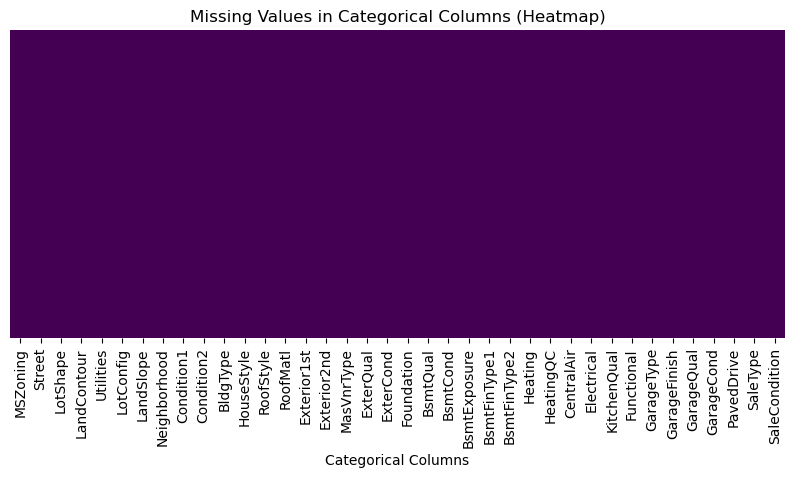

In [85]:
# Visualize missing values in categorical columns using a heatmap
plt.figure(figsize=(10, 4))
sns.heatmap(data_categorical.isnull(), cbar=False, cmap="viridis", yticklabels=False)
plt.title("Missing Values in Categorical Columns (Heatmap)")
plt.xlabel("Categorical Columns")
plt.show()